In [11]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
import math

In [12]:
def g(y):
    if y <= 0.25 or y >=0.75:
        return 0.0
    else:
        return np.exp(1/((y - 0.25)*(y - 0.75)))/np.exp(-4/(0.75 - 0.25)**2)

def f(y):
    return [0.0 if elem <= 0.25 or elem >= 0.75 else np.exp(1/((elem - 0.25)*(elem - 0.75)))/np.exp(-4/(0.75 - 0.25)**2) for elem in y]

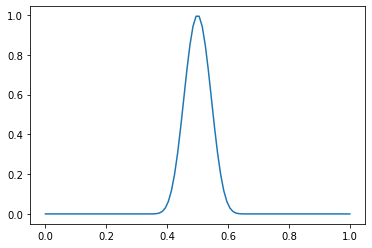

In [13]:
y = np.linspace(0, 1, 100)
plt.plot(y, f(y))

In [14]:
h = lambda y: 1 + quad(g, 0, y)[0]

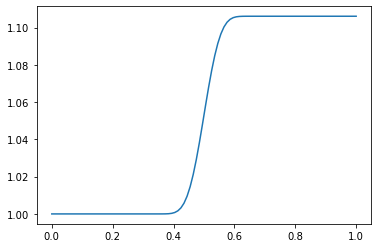

In [15]:
plt.plot(y, [h(i) for i in y])

In [18]:
h_pert = lambda x, y: 1 + quad(g, 0, y)[0] + 0.01*np.sin(np.pi*y)/(np.exp(9*(x - 0.5)**2)*np.exp(225*(y - 0.5)**2))

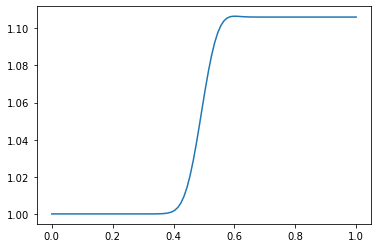

In [19]:
plt.plot(y, [h_pert(0.5, i) for i in y])

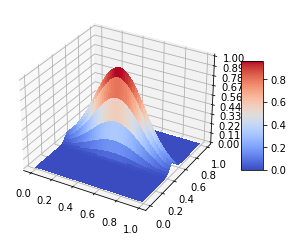

In [10]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.pi*Y)/(np.exp(9*(X - 0.5)**2)*np.exp(225*(Y - 0.5)**2))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Text(0.5, 1.0, 'Simplest default with labels')

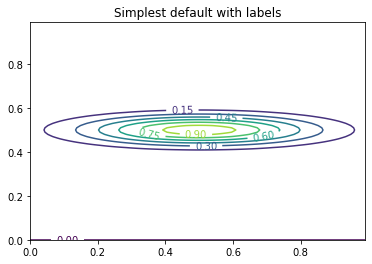

In [9]:

delta = 0.01
x = np.arange(0, 1.0, delta)
y = np.arange(0, 1.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.pi*Y)/(np.exp(9*(X - 0.5)**2)*np.exp(225*(Y - 0.5)**2))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')